<a href="https://colab.research.google.com/github/Raphael181/Raphael181/blob/main/Predicting_object_using_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load dataset
fashion_mnist = keras.datasets.fashion_mnist
#split the dataset into testing and training
(train_images , train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0,23,23]

194

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
#creating an array of labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover' , "Dress", "Coat", "Sandal" , "Shirt", "Sneaker", "Bag", "Ankle boot"]

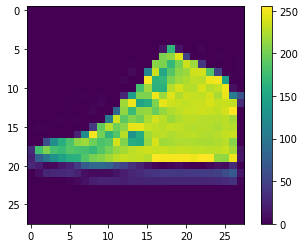

In [ ]:
#using matplotlib to show what one of the images looks like
plt.figure()
plt.imshow(train_images[607])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Data preprocessing
#Squish all values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
#Building the model
models = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)), #input layer
        keras.layers.Dense(128,activation='relu'), #hidden layer
        keras.layers.Dense(10, activation = 'softmax') #output layer          
])

In [ ]:
#Compiling the model
models.compile(optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#Train the model
models.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1732 - accuracy: 0.9352


In [ ]:
#Testing the model
test_loss , test_acc = models.evaluate(test_images, test_labels, verbose = 1)

print('Test accuracy:' , test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3733 - accuracy: 0.8871
Test accuracy: 0.8870999813079834


Ankle boot


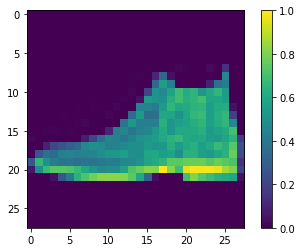

In [ ]:
#make predictions
predictions = models.predict(test_images)
print(class_names[np.argmax(predictions[0])])
#Show the picture
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#verifying the predictions
#the code block allows the user to input a number and return a prediction